In [1]:
import h5py
import torch
import numpy as np
import matplotlib.pyplot as plt
from random import randint

from keypoint_dataset import KeypointDataset


In [2]:

# Visualizar keypoints
def plot_keypoints(keypoints, title="Keypoints"):
    """
    Función para graficar los keypoints 2D.
    keypoints: Tensor de shape (T, N, 2) donde T es el número de frames, N es el número de keypoints y 2 son las coordenadas.
    """
    plt.figure(figsize=(10, 6))
    for frame in range(keypoints.shape[0]):  # Iteramos sobre cada frame de la secuencia
        plt.plot(keypoints[frame, :, 0].numpy(), keypoints[frame, :, 1].numpy(), 'bo-', alpha=0.6)  # 'bo-' es para dibujar puntos con líneas
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


In [3]:
h5_file = "/home/giorgio6846/Code/Sign-AI/data/dataset_small2.hdf5"
kd = KeypointDataset(h5_file, data_augmentation=True, return_label=True)
train_dataset, validation_dataset, train_length, val_length = kd.split_dataset(0.5)

Videos:  2


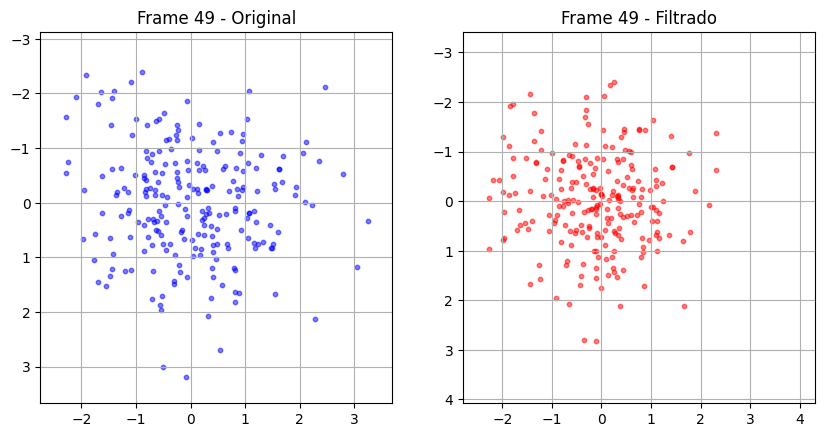

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def visualize_augmentation(keypoints, f_keypoint, augmentation_name=""):
    """
    Visualiza la animación de los keypoints originales y los keypoints después de una augmentación.
    
    Args:
    - keypoints: Tensor de shape (T, N, 2) para los keypoints originales.
    - f_keypoint: Tensor de shape (T, N, 2) para los keypoints después de aplicar la augmentación.
    - augmentation_name: Nombre de la augmentación para mostrar en los títulos.
    """
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # ax será ahora un array con 2 elementos
    ax[0].set_title(f'Keypoints Originales - {augmentation_name}')
    ax[1].set_title(f'Keypoints aumentados - {augmentation_name}')

    # Graficar los puntos clave en ambos subgráficos
    sc1 = ax[0].scatter(keypoints[0, :, 0], keypoints[0, :, 1], s=10, c='blue', alpha=0.5)
    sc2 = ax[1].scatter(f_keypoint[0, :, 0], f_keypoint[0, :, 1], s=10, c='red', alpha=0.5)

    # Configuración de la visualización
    for a in ax:
        a.grid(True)
        a.set_aspect('equal')
        a.invert_yaxis()  # Invertir eje Y para que coincida con la convención de coordenadas

    # Función para actualizar la animación
    def update(frame):
        points = keypoints[frame]
        filtered_points = f_keypoint[frame]
        sc1.set_offsets(points)  # Actualizar posiciones de keypoints originales
        sc2.set_offsets(filtered_points)  # Actualizar posiciones de keypoints filtrados
        ax[0].set_title(f'Frame {frame} - Original')
        ax[1].set_title(f'Frame {frame} - Filtrado')
        return sc1, sc2

    # Crear la animación
    anim = FuncAnimation(fig, update, frames=keypoints.shape[0], interval=50, blit=True)

    # Mostrar la animación en el notebook
    return HTML(anim.to_jshtml())

# Llamar a la función con los datos de keypoints antes y después de la augmentación
# Ejemplo de uso:
# visualizamos los keypoints originales y los filtrados después de aplicar "Gaussian_jitter"

keypoints = torch.randn(50, 230, 2)  # 50 frames, 230 keypoints, 2 coordenadas (X, Y)
f_keypoint = torch.randn(50, 230, 2)  # 50 frames, 230 keypoints, 2 coordenadas (X, Y)

visualize_augmentation(keypoints, f_keypoint, augmentation_name="Gaussian Jitter")


Dataset: Gaussian_jitter
Dataset: Horizontal_flip


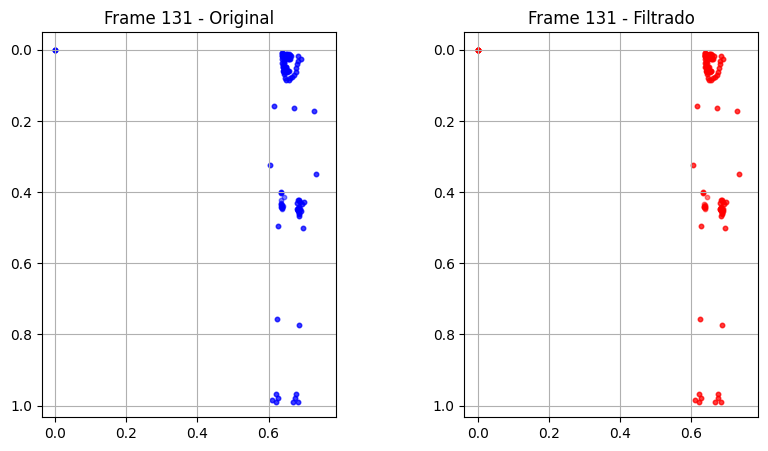

In [10]:
keypoints = train_dataset[2][0]
visualize_augmentation(train_dataset[0][0], train_dataset[4][0], augmentation_name="Gaussian Jitter")

In [6]:

keypoints = kd[4000][0].clone()
f_keypoint = kd.gaussian_jitter(keypoints, sigma=0.003, clip=3.0)

visualize_augmentation(keypoints, f_keypoint, augmentation_name="Gaussian Jitter")


IndexError: list index out of range

In [ ]:
f_keypoint = kd.length_variance(keypoints)

visualize_augmentation(keypoints, f_keypoint, augmentation_name="Length Variance")

In [ ]:

#Aplicar augmentación: Rotation 2D
f_keypoint = kd.rotation_2D(keypoints)
visualize_augmentation(keypoints, f_keypoint, augmentation_name="Rotation 2D")


In [ ]:


# Aplicar augmentación: Horizontal Flip
f_keypoint = kd.horizontal_flip(keypoints)
visualize_augmentation(keypoints, f_keypoint, augmentation_name="Horizontal Flip")


In [ ]:

# Aplicar augmentación: Scaling
f_keypoint = kd.scaling(keypoints)
visualize_augmentation(keypoints, f_keypoint, augmentation_name="Scaling")